# Visual Insights into ESG: Exploratory Data Analysis of S&P 500 Financial Sector

## Importing the Dataset and the Necessary Libaries 

In [8]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

data = pd.read_csv("SP 500 ESG Risk Ratings.csv")

## Exploratory Analysis 

In [9]:
# Overview of the dataset and it's structure.
data.head()

,Symbol,Name,Address,Sector,Industry,Full Time Employees,Description,Total ESG Risk score,Environment Risk Score,Governance Risk Score,Social Risk Score,Controversy Level,Controversy Score,ESG Risk Percentile,ESG Risk Level
0,A,Agilent Technologies Inc,"5301 Stevens Creek Boulevard\nSanta Clara, CA ...",Healthcare,Diagnostics & Research,"18,000","Agilent Technologies, Inc. provides applicatio...",15.0,0.3,6.3,8.6,Low,1.0,11th percentile,Low
1,AAL,American Airlines Group Inc,"1 Skyview Drive\nFort Worth, TX 76155\nUnited ...",Industrials,Airlines,"132,500","American Airlines Group Inc., through its subs...",29.0,12.0,5.0,12.0,Moderate,2.0,62nd percentile,NaN
2,AAP,Advance Auto Parts Inc,"4200 Six Forks Road\nRaleigh, NC 27609\nUnited...",Consumer Cyclical,Specialty Retail,"40,000","Advance Auto Parts, Inc. provides automotive r...",12.0,0.0,3.0,8.0,Moderate,2.0,4th percentile,Negligible
3,AAPL,Apple Inc,"One Apple Park Way\nCupertino, CA 95014\nUnite...",Technology,Consumer Electronics,"164,000","Apple Inc. designs, manufactures, and markets ...",17.0,0.6,9.2,6.9,Significant,3.0,15th percentile,Low
4,ABBV,Abbvie Inc,"1 North Waukegan Road\nNorth Chicago, IL 60064...",Healthcare,Drug Manufacturers—General,"50,000","AbbVie Inc. discovers, develops, manufactures,...",28.0,1.1,9.9,16.8,Significant,3.0,55th percentile,Medium


In [10]:
# Overview of statistical properties of the dataset. 
data.describe()

,Total ESG Risk score,Environment Risk Score,Governance Risk Score,Social Risk Score,Controversy Score
count,433.000000,433.000000,433.000000,433.000000,433.000000
mean,21.422633,5.678984,6.673903,9.045035,1.896074
std,7.264458,5.339965,2.201049,3.813788,0.940748
min,7.000000,0.000000,3.000000,1.100000,0.000000
25%,16.000000,1.500000,5.000000,6.600000,1.000000
50%,21.000000,3.800000,6.000000,8.700000,2.000000
75%,26.000000,8.900000,7.700000,11.600000,2.000000
max,46.000000,25.000000,15.500000,21.000000,5.000000


## Visualising the Makeup of ESG Scores by Sector

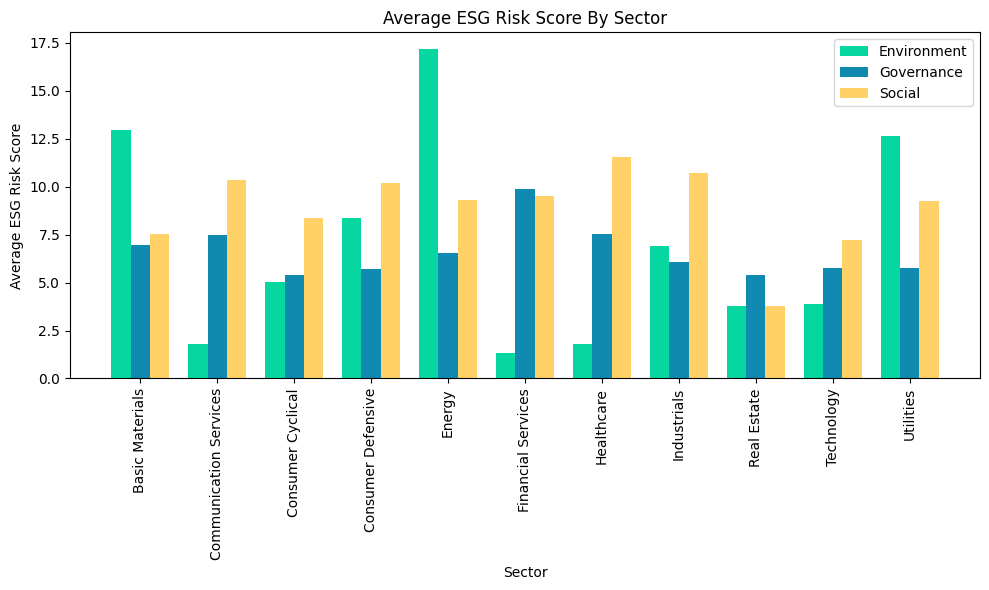

In [11]:
custom_colors = {
    'Environment Risk Score': "#06d6a0",
    'Governance Risk Score': "#118ab2",
    'Social Risk Score': "#ffd166"
}

# Calculating Sector-wise Average ESG Scores
sector_avg_scores = data.groupby('Sector')[['Environment Risk Score', 'Governance Risk Score', 'Social Risk Score']].mean().reset_index()

# Extracting sector names and scores
sectors = sector_avg_scores['Sector']
environment_scores = sector_avg_scores['Environment Risk Score']
governance_scores = sector_avg_scores['Governance Risk Score']
social_scores = sector_avg_scores['Social Risk Score']

# Creating the Bar Chart
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.25
index = range(len(sectors))

bar1 = ax.bar(index, environment_scores, bar_width, color=custom_colors['Environment Risk Score'], label='Environment')
bar2 = ax.bar([i + bar_width for i in index], governance_scores, bar_width, color=custom_colors['Governance Risk Score'], label='Governance')
bar3 = ax.bar([i + 2*bar_width for i in index], social_scores, bar_width, color=custom_colors['Social Risk Score'], label='Social')

#Customising the Layout and Displaying the Plot
ax.set_xlabel('Sector')
ax.set_ylabel('Average ESG Risk Score')
ax.set_title('Average ESG Risk Score By Sector')
ax.set_xticks([i + bar_width for i in index])
ax.set_xticklabels(sectors, rotation=90)
ax.legend()

plt.tight_layout()
plt.show()


## Looking into the Financial Services Industry: Comparative Analysis of Variable Correlations

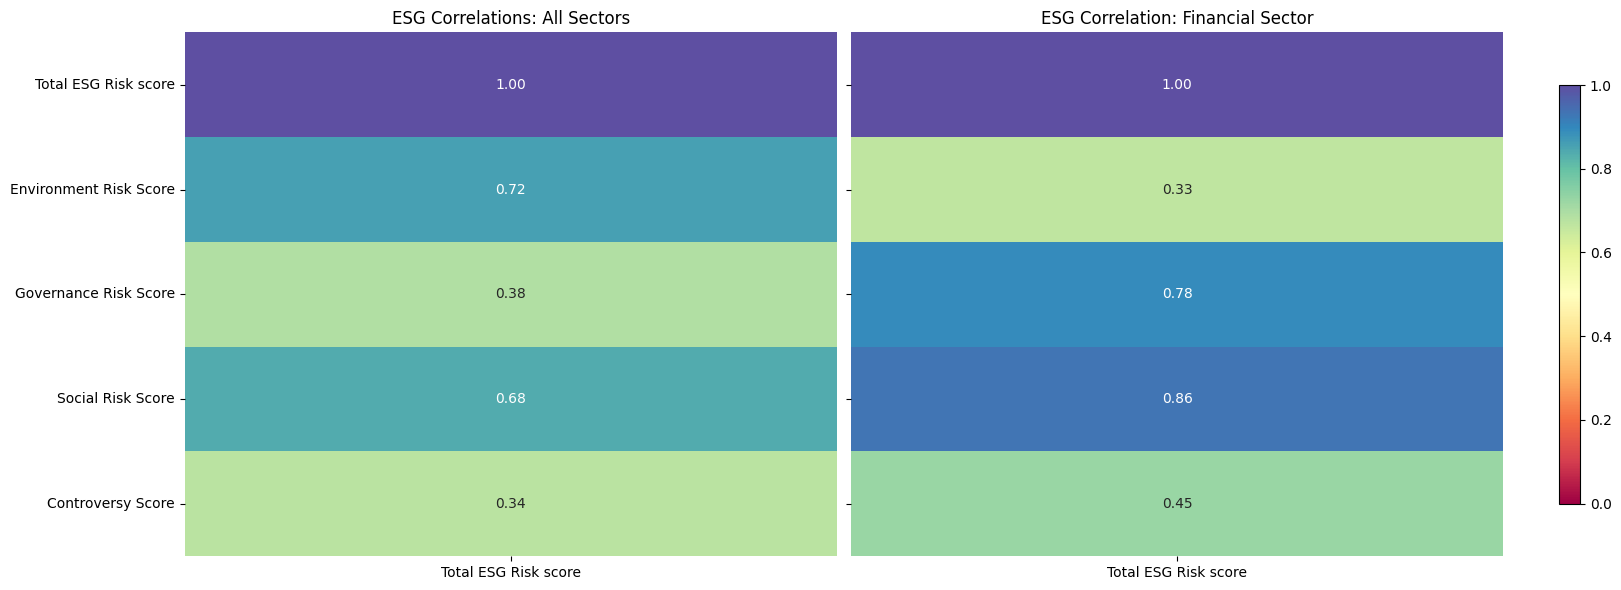

In [12]:
# Selecting only numeric data for correlation
numeric_data = data.select_dtypes(include=[np.number])
numeric_financial_data = numeric_data[data['Sector'] == 'Financial Services']

# Calculate the correlation matrices
correlation_matrix_all = numeric_data.corr()
correlation_matrix_financial = numeric_financial_data.corr()
first_variable = numeric_data.columns[0]

# Creating a figure with two subplots so that the output can be arranged side by side
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True) 

# Data and titles for each subplot
datasets = [(correlation_matrix_all, 'ESG Correlations: All Sectors'), (correlation_matrix_financial, 'ESG Correlation: Financial Sector')]

# Looping for plotting the heatmaps
for ax, (dataset, title) in zip(axes, datasets):
    correlations_with_first = dataset[first_variable].to_frame()
    sns.heatmap(correlations_with_first, annot=True, cmap='Spectral', vmin=-1, vmax=1, fmt=".2f", ax=ax, cbar=False)
    ax.set_title(title)

# Displaying everything to minise overlap
plt.tight_layout()
sm = plt.cm.ScalarMappable(cmap='Spectral', norm=plt.Normalize(vmin=0, vmax=1))
sm.set_array([])  # You can also use sm._A = []
fig.colorbar(sm, ax=axes.ravel().tolist(), orientation='vertical', fraction=0.015, pad=0.04)
plt.show()


## Visualisation and Analysis of ESG Scores in the Financial Services Sector

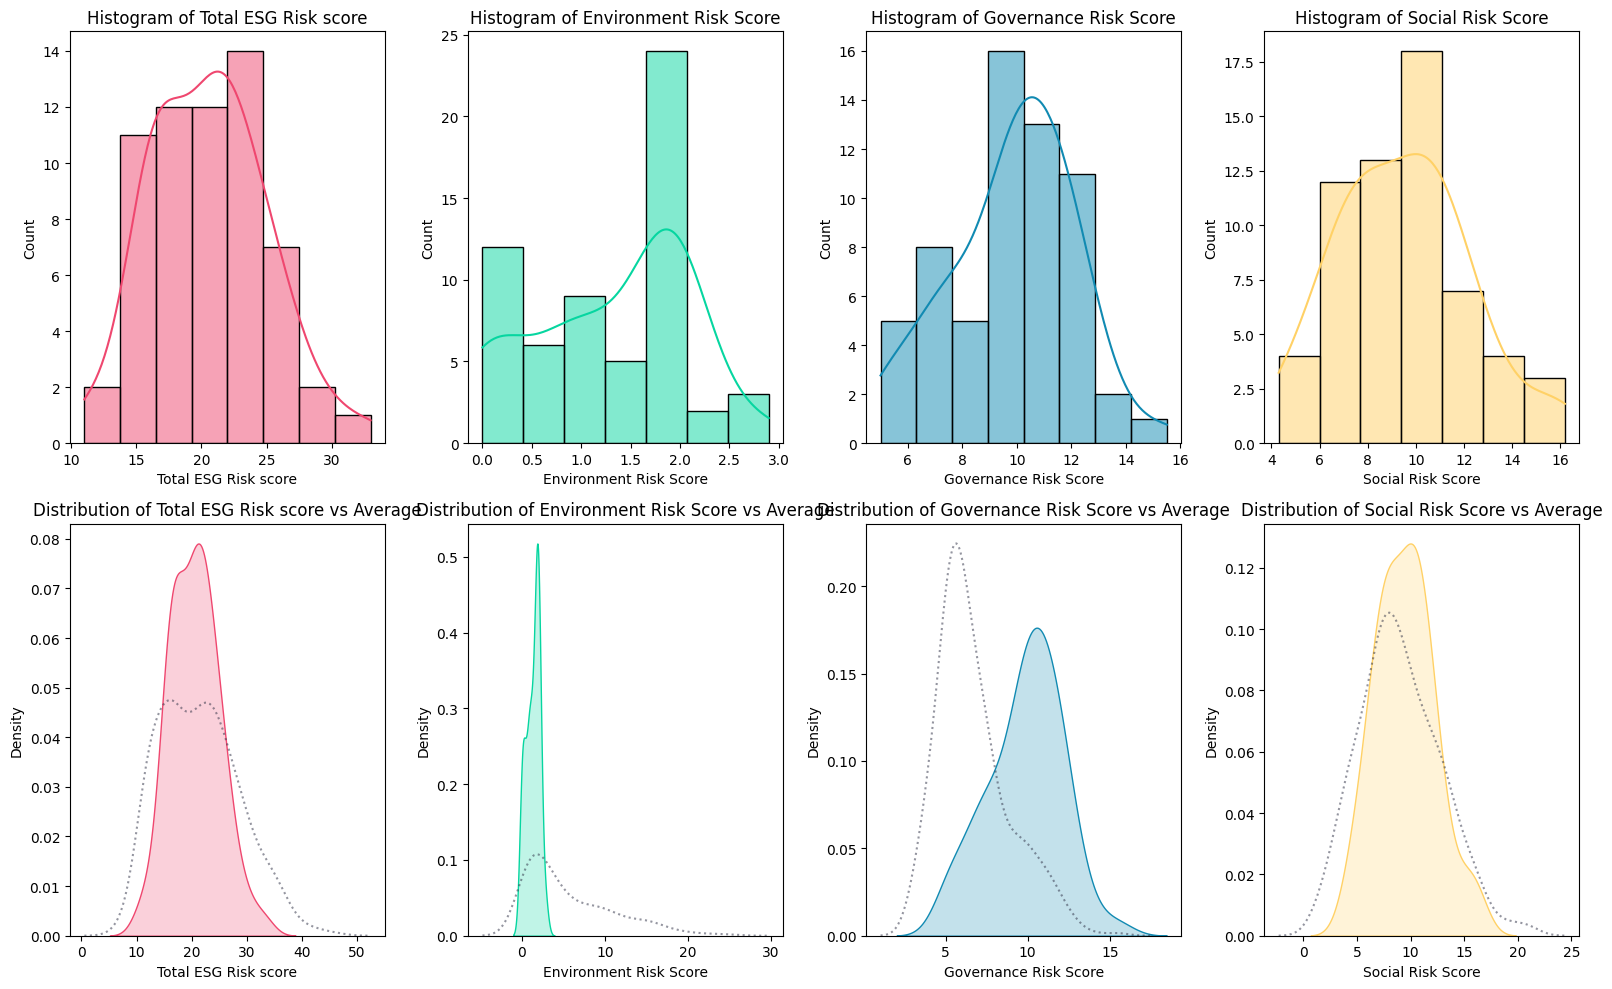

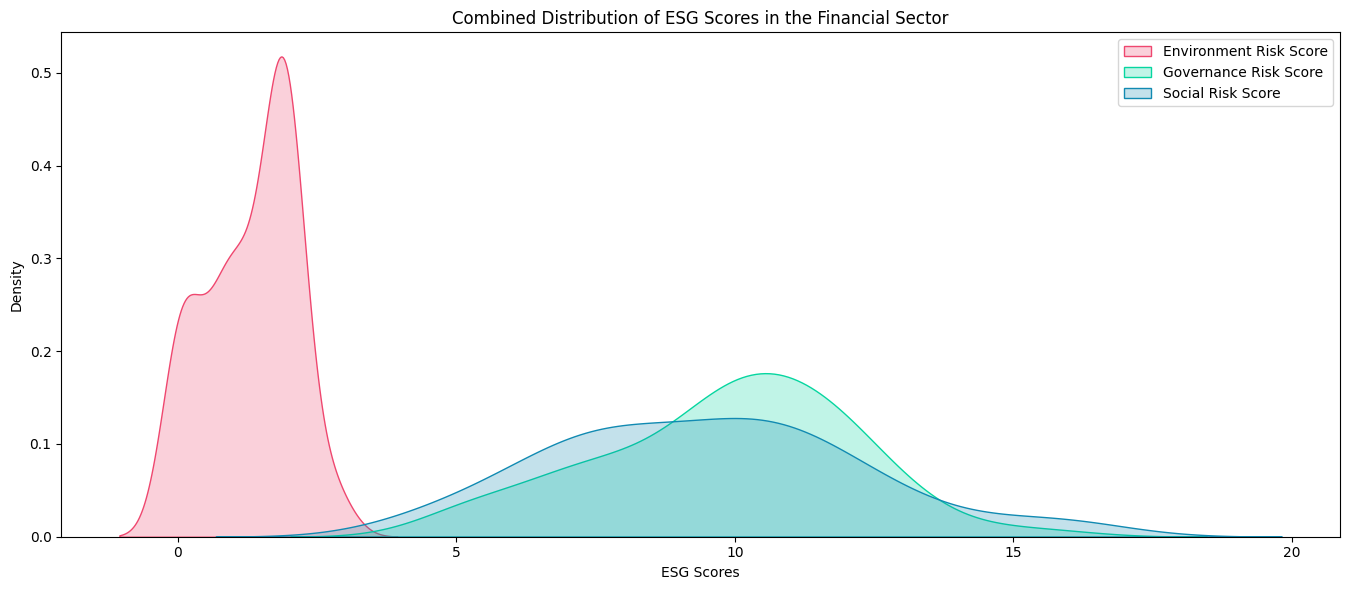

In [13]:
# Filtering data for the Financial Sector
financial_sector_data = data[data['Sector'] == 'Financial Services']

# Selecting ESG scores for the Financial Sector
esg_scores_financial = financial_sector_data[['Total ESG Risk score', 'Environment Risk Score', 'Governance Risk Score', 'Social Risk Score']]

mean_esg_scores = data[['Total ESG Risk score', 'Environment Risk Score', 'Governance Risk Score', 'Social Risk Score']].mean()

# Custom color palette
colors = ["#ef476f", "#06d6a0", "#118ab2", "#ffd166", "#2b2d42"]


# Creating subplots for histograms and distribution plots
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 10))
plt.subplots_adjust(wspace=0.4)

for i, score_type in enumerate(mean_esg_scores.index):
    # Distribution plot for each score type
    sns.kdeplot(data[score_type],  color=colors[4], ax=axes[1, i], linestyle=':', alpha=0.5)
    axes[1,i].set_title(f'Distribution of {score_type} vs Average')

# Looping through each ESG score type and creating plots
for i, score_type in enumerate(esg_scores_financial.columns):
    
    # Histogram on the first row
    sns.histplot(financial_sector_data[score_type], kde=True, color=colors[i], ax=axes[0, i])
    axes[0, i].set_title(f'Histogram of {score_type}')
    # Distribution plot on the second row
    sns.kdeplot(financial_sector_data[score_type], shade=True, color=colors[i], ax=axes[1, i])
    
# Displaying Plot
plt.tight_layout()
plt.tight_layout()
plt.show()

plt.figure(figsize=(13.6, 6))

# Plotting Combined Distribution Graph
for i, col in enumerate(esg_scores_financial.columns[1:4]):  
    sns.kdeplot(
        esg_scores_financial[col],
        color=colors[i], 
        label=col, 
        fill=True
    )
    
plt.xlabel('ESG Scores')
plt.ylabel('Density')
plt.title('Combined Distribution of ESG Scores in the Financial Sector')

plt.legend()
plt.tight_layout()
plt.show()


## Total ESG Scores in the Financial Services Sector by Company

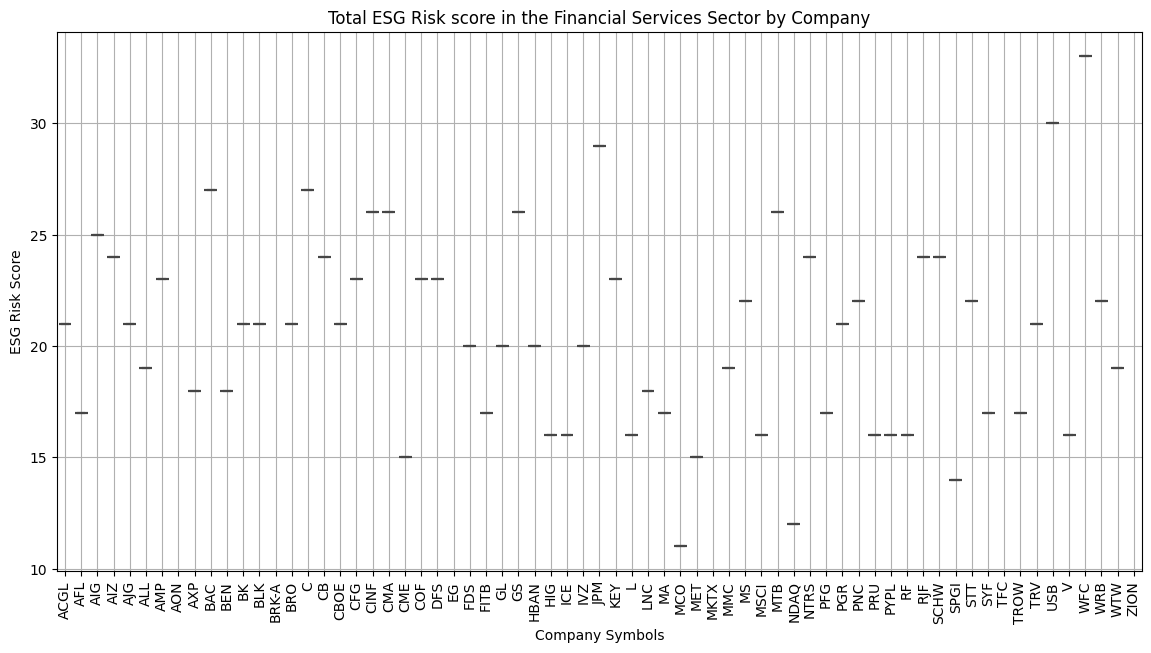

In [14]:
# Plotting the ESG Risk Score for Every Company in the Financial Sector
plt.figure(figsize=(14, 7))
sns.boxplot(x='Symbol', y='Total ESG Risk score', data=financial_sector_data)
plt.xticks(rotation=90)
plt.title('Total ESG Risk score in the Financial Services Sector by Company')
plt.xlabel('Company Symbols')
plt.ylabel('ESG Risk Score')
plt.grid()
plt.show()
